# **K Means Clustering**

**Importing Dependencies**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

**Scratch Implementation**

In [2]:
class KMeans:
    # Constructor function to initialize values:
    def __init__(self, n_clusters=2, max_iter=100):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.centroids = None
        self.inertia_ = None

    # function to fit the K-Means model & return the prediction on training dataset:
    def fit_predict(self, X):
        X = np.array(X)

        # Initialize centroid points:
        random_index = random.sample(range(0, X.shape[0]), self.n_clusters)
        self.centroids = X[random_index]

        for i in range(self.max_iter):
            # Assign clusters:
            cluster_group = self.assign_clusters(X)

            # Move centroids:
            old_centroids = self.centroids
            self.centroids = self.move_centroids(X, cluster_group)

            # Check finish:
            if np.allclose(old_centroids, self.centroids):
                break
        self.inertia_ = self.inertia(X)
        return cluster_group

    # function to assign cluster group to data points:
    def assign_clusters(self, X):
        cluster_group = []
        distances = []

        for row in X:
            for centroid in self.centroids:
                distance = np.sqrt(np.dot(row - centroid, row - centroid))
                distances.append(distance)
            index_pos = np.argmin(distances)
            cluster_group.append(index_pos)
            distances.clear()
        return np.array(cluster_group)

    # function to move the centroids:
    def move_centroids(self, X, cluster_group):
        new_centroids = []
        for i in range(self.n_clusters):
            points = X[cluster_group == i]
            if len(points) == 0:
                new_centroids.append(self.centroids[i])
            else:
                new_centroids.append(points.mean(axis=0))
        return np.array(new_centroids)

    # Inertia:
    def inertia(self, X):
        cluster_group = self.assign_clusters(X)
        inertia = 0
        for i in range(self.n_clusters):
            cluster_data = X[cluster_group == i]
            centroid = self.centroids[i]
            inertia += np.sum((cluster_data - centroid) ** 2)
        return float(inertia)

**Dataset Loading & Preprocessing**

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/Mall_Customers.csv")
df.shape

(200, 5)

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


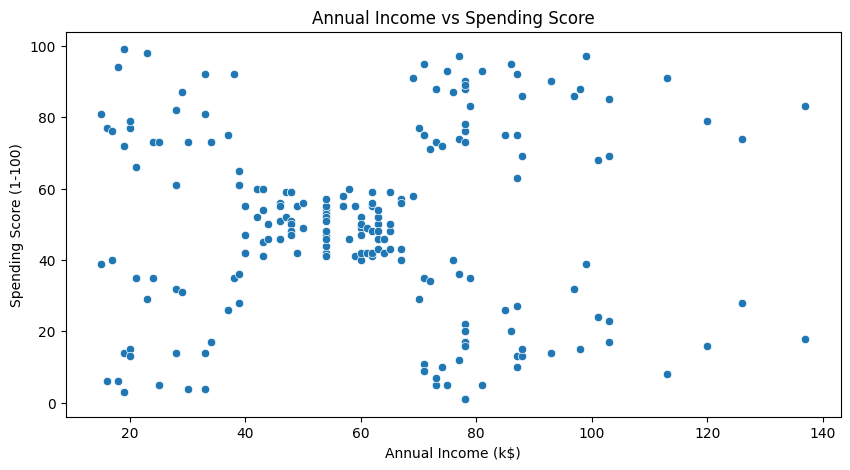

In [5]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x="Annual Income (k$)", y="Spending Score (1-100)", data=df)
plt.title("Annual Income vs Spending Score")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()

In [6]:
X = df.drop(columns=['CustomerID','Gender','Age'], axis=1).values

**Determining number of clusters (K) using Elbow Method**

In [7]:
WCSS = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, max_iter=100)
    kmeans.fit_predict(X)
    WCSS.append(kmeans.inertia_)
print(WCSS)

[269981.28, 183653.32894736843, 106348.37306211118, 73880.64496247197, 44448.45544793371, 38814.85005256372, 32205.075247620596, 28087.914225489956, 26372.614102934105]


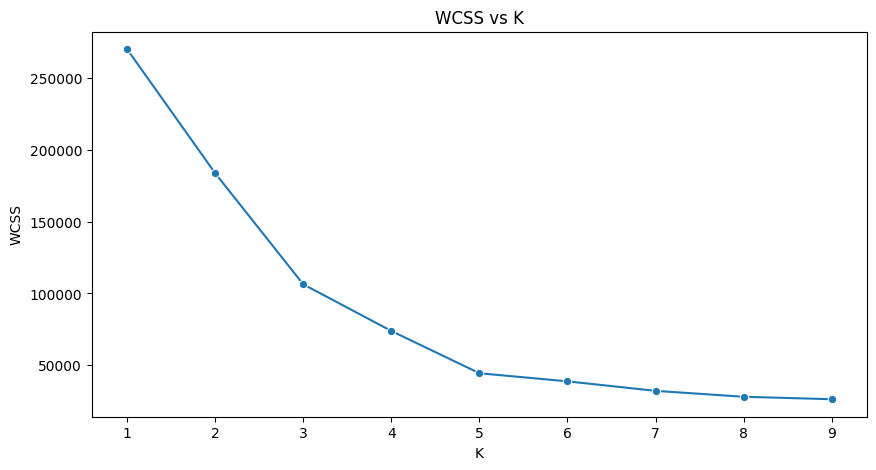

In [8]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=range(1, 10), y=WCSS, marker='o')
plt.title("WCSS vs K")
plt.xlabel("K")
plt.ylabel("WCSS")
plt.show()

**Number of Clusters (K) = 5**

In [9]:
kmeans = KMeans(n_clusters=5, max_iter=1000)
cluster_group = kmeans.fit_predict(X)

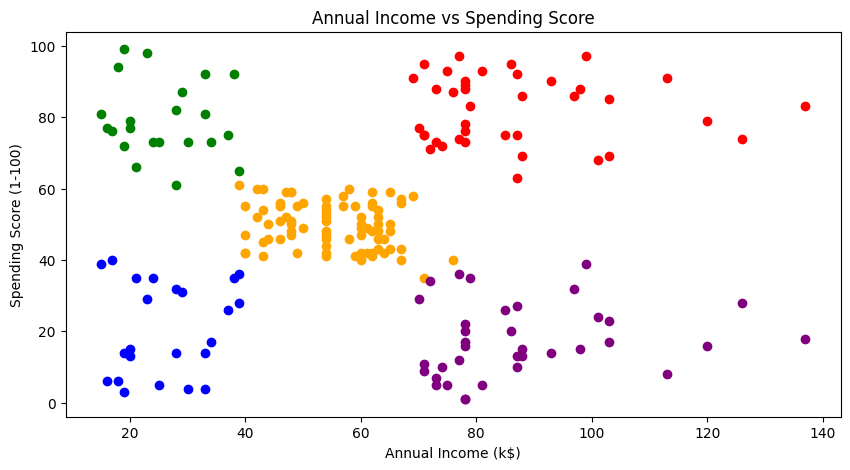

In [10]:
plt.figure(figsize=(10, 5))
plt.scatter(X[cluster_group == 0, 0], X[cluster_group == 0, 1], c='orange')
plt.scatter(X[cluster_group == 1, 0], X[cluster_group == 1, 1], c='blue')
plt.scatter(X[cluster_group == 2, 0], X[cluster_group == 2, 1], c='green')
plt.scatter(X[cluster_group == 3, 0], X[cluster_group == 3, 1], c='red')
plt.scatter(X[cluster_group == 4, 0], X[cluster_group == 4, 1], c='purple')
plt.title("Annual Income vs Spending Score")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()